Import von Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat 
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt

 `sas7bdat` einlesen 

##### Daten von 2018

Die Daten für die Analyse wurden direkt von der Internetseite von OECD geladen:

https://www.oecd.org/pisa/data/2018database/


In [2]:
df, meta = pyreadstat.read_sas7bdat('cy07_msu_stu_qqq.sas7bdat', catalog_file='CY07MSU_FMT_STU_QQQ.SAS7BCAT', formats_as_category=True, encoding="UTF-8")
df

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,i
0,8.0,ALB,800115.0,800001.0,07MS,000800,ALB0107,0080000,0.0,2.0,...,325.281,370.041,358.524,345.833,380.064,357.376,385.496,0.48064,09MAY19:11:20:53,31.0
1,8.0,ALB,800300.0,800002.0,07MS,000800,ALB0105,0080000,0.0,2.0,...,337.259,294.530,325.444,367.058,333.356,367.616,334.448,1.30666,09MAY19:11:20:54,31.0
2,8.0,ALB,800088.0,800003.0,07MS,000800,ALB0101,0080000,0.0,2.0,...,297.929,269.282,293.719,314.027,295.519,283.143,315.992,0.67391,09MAY19:11:20:54,31.0
3,8.0,ALB,800014.0,800004.0,07MS,000800,ALB0109,0080000,0.0,2.0,...,349.369,333.416,320.410,388.597,324.419,372.543,355.213,0.68250,09MAY19:11:20:53,31.0
4,8.0,ALB,800294.0,800005.0,07MS,000800,ALB0203,0080000,0.0,2.0,...,461.508,464.534,461.681,455.574,430.815,476.752,482.148,0.63579,09MAY19:11:20:53,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611999,983.0,QRT,98300553.0,98329092.0,07MS,064300,QRT8787,9830000,0.0,2.0,...,462.153,531.441,477.917,485.898,494.514,472.717,511.955,0.75437,01MAY19:20:23:24,31.0
612000,983.0,QRT,98300772.0,98329094.0,07MS,064300,QRT8787,9830000,0.0,2.0,...,699.966,663.397,698.064,713.841,654.645,673.390,637.977,0.74374,01MAY19:20:23:26,31.0
612001,983.0,QRT,98300786.0,98329104.0,07MS,064300,QRT8787,9830000,0.0,2.0,...,464.194,419.584,452.556,359.791,408.793,421.102,474.580,0.80152,01MAY19:20:23:26,31.0
612002,983.0,QRT,98300741.0,98329116.0,07MS,064300,QRT8787,9830000,0.0,2.0,...,313.494,359.489,334.815,321.417,351.288,328.455,354.408,0.73760,01MAY19:20:23:25,31.0


In [3]:
columns_list = meta.column_names_to_labels # ich lese die Erläuterungen für die Spalten ein
columns_list['CNT']

'Country code 3-character'

In [4]:
#Auskommentieren, um alle 1119 Spalten-Erläuterungen zu lesen:
#columns

In [5]:
df.columns = df.columns.map(columns_list)

In [6]:
df.head()

,Country Identifier,Country code 3-character,Intl. School ID,Intl. Student ID,PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT),National Centre 6-digit Code,Stratum ID 7-character (cnt + region ID + original stratum ID),Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID),OECD country,Mode of Respondent,...,Plausible Value 4 in Text Structure Subscale of Reading - Multiple,Plausible Value 5 in Text Structure Subscale of Reading - Multiple,Plausible Value 6 in Text Structure Subscale of Reading - Multiple,Plausible Value 7 in Text Structure Subscale of Reading - Multiple,Plausible Value 8 in Text Structure Subscale of Reading - Multiple,Plausible Value 9 in Text Structure Subscale of Reading - Multiple,Plausible Value 10 in Text Structure Subscale of Reading - Multiple,Senate Weight (sum of 5000 per country),Date of the database creation,NaN
0,8.0,ALB,800115.0,800001.0,07MS,000800,ALB0107,0080000,0.0,2.0,...,325.281,370.041,358.524,345.833,380.064,357.376,385.496,0.48064,09MAY19:11:20:53,31.0
1,8.0,ALB,800300.0,800002.0,07MS,000800,ALB0105,0080000,0.0,2.0,...,337.259,294.530,325.444,367.058,333.356,367.616,334.448,1.30666,09MAY19:11:20:54,31.0
2,8.0,ALB,800088.0,800003.0,07MS,000800,ALB0101,0080000,0.0,2.0,...,297.929,269.282,293.719,314.027,295.519,283.143,315.992,0.67391,09MAY19:11:20:54,31.0
3,8.0,ALB,800014.0,800004.0,07MS,000800,ALB0109,0080000,0.0,2.0,...,349.369,333.416,320.410,388.597,324.419,372.543,355.213,0.68250,09MAY19:11:20:53,31.0
4,8.0,ALB,800294.0,800005.0,07MS,000800,ALB0203,0080000,0.0,2.0,...,461.508,464.534,461.681,455.574,430.815,476.752,482.148,0.63579,09MAY19:11:20:53,31.0


In [7]:
digit_2018 = df.groupby('How old were you when you first used a digital device?').size()  
digit_2018 = pd.DataFrame(digit_2018)

In [8]:
digit_2018.reset_index(level=0, inplace=True)
digit_2018.columns=['Alter', 'Count']
digit_2018

,Alter,Count
0,1.0,26404
1,2.0,97541
2,3.0,124618
3,4.0,73863
4,5.0,24009
5,6.0,4053


In [9]:
int_2018 = df.groupby('How old were you when you first accessed the Internet?').size()  
int_2018 = pd.DataFrame(int_2018)
int_2018.reset_index(level=0, inplace=True)
int_2018.columns=['Alter', 'Count' ]

In [10]:
int_2018

,Alter,Count
0,1.0,10153
1,2.0,64058
2,3.0,136804
3,4.0,107172
4,5.0,32955
5,6.0,1388


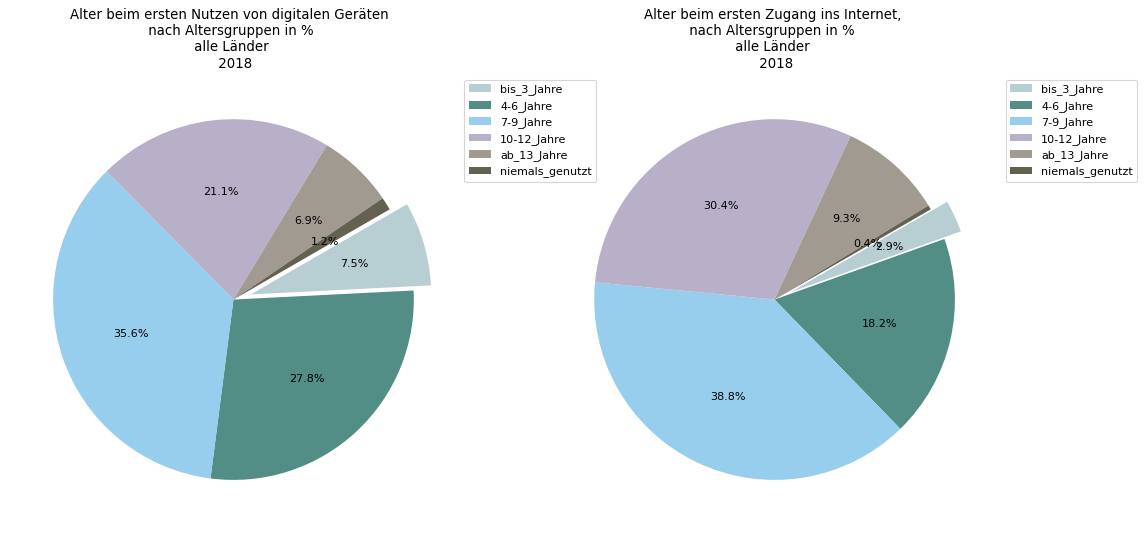

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), dpi= 80)

vals = digit_2018['Count']
vals_i = int_2018['Count']
colors = ['#b7ced2','#528e86','#97cded', '#b8afc9', '#a19a90', '#636250']

labels = ['bis_3_Jahre', '4-6_Jahre','7-9_Jahre', '10-12_Jahre', 'ab_13_Jahre', 'niemals_genutzt']
explode = (0.1,0,0,0,0,0)
explode_i = (0.1,0,0,0,0,0)
ax1.pie(vals, colors = colors, autopct='%1.1f%%', explode=explode, rotatelabels=True, startangle=30, counterclock=False)
ax2.pie(vals_i, colors = colors, autopct='%1.1f%%', explode=explode_i, rotatelabels=True, startangle=30, counterclock=False)

ax1.legend( labels, loc="upper left", bbox_to_anchor=(1, 0, 0.3, 1))  
ax2.legend( labels, loc="upper left", bbox_to_anchor=(1, 0, 0.3, 1)) 
ax1.set_title('Alter beim ersten Nutzen von digitalen Geräten  \n nach Altersgruppen in %  \n alle Länder  \n 2018')
ax2.set_title('Alter beim ersten Zugang ins Internet, \n nach Altersgruppen in %  \n alle Länder  \n 2018')
plt.show()

### Plausible values

Bei der Berechnung ich verwende die "naive" statistische Methode und benutze einen Durchschnitt der PVs pro Schüler:

In [12]:
df['math']=df.loc[:, 'Plausible Value 1 in Mathematics':'Plausible Value 10 in Mathematics'].mean(axis=1)
df['read'] = df.loc[:, 'Plausible Value 1 in Reading':'Plausible Value 10 in Reading'].mean(axis=1)
df['scie'] = df.loc[:, 'Plausible Value 1 in Science':'Plausible Value 10 in Science'].mean(axis=1)

### Alter beim ersten Nutzen von digitalen Geräten und schulische Leistung im Jahre 2018.

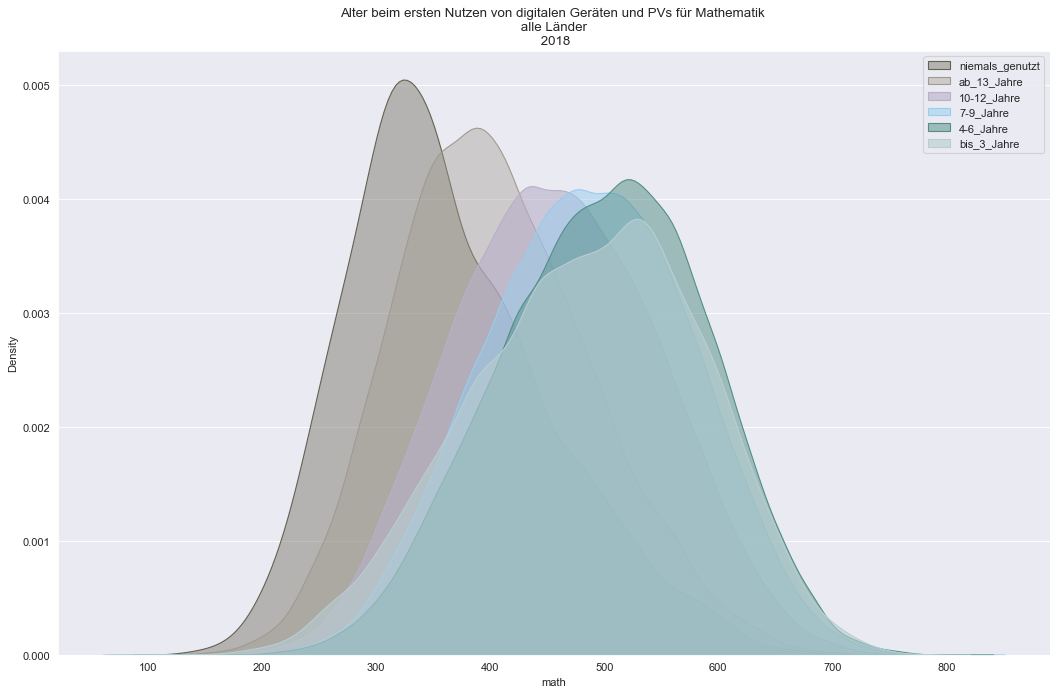

In [13]:
"""Beispiel von PVs für Mathematik """

plt.figure(figsize=(16,10), dpi= 80)  
sns.set_style(style = 'darkgrid')
sns.kdeplot(df.loc[df['How old were you when you first used a digital device?'] == 6, "math"], shade=True, color="#636250", label='niemals_genutzt', alpha=.4)
sns.kdeplot(df.loc[df['How old were you when you first used a digital device?'] == 5, "math"], shade=True, color="#a19a90", label='ab_13_Jahre', alpha=.4)
sns.kdeplot(df.loc[df['How old were you when you first used a digital device?'] == 4, "math"], shade=True, color="#b8afc9", label='10-12_Jahre', alpha=.6)
sns.kdeplot(df.loc[df['How old were you when you first used a digital device?'] == 3, "math"], shade=True, color="#97cded", label='7-9_Jahre', alpha=.5)
sns.kdeplot(df.loc[df['How old were you when you first used a digital device?'] == 2, "math"], shade=True, color="#528e86", label='4-6_Jahre', alpha=.5)
sns.kdeplot(df.loc[df['How old were you when you first used a digital device?'] == 1, "math"], shade=True, color="#b7ced2", label='bis_3_Jahre', alpha=.6)


plt.title('Alter beim ersten Nutzen von digitalen Geräten und PVs für Mathematik \n alle Länder \n 2018')
plt.legend()
plt.show()

In [15]:
age_map = {1: 'bis_3_Jahre', 2: '4-6_Jahre', 3: '7-9_Jahre', 4: '10-12_Jahre', 5: 'ab_13_Jahre', 6:  'niemals_genutzt'}
df['dig_age'] = df['How old were you when you first used a digital device?'].map(age_map)
df['int_age'] = df['How old were you when you first accessed the Internet?'].map(age_map)


In [16]:
df_boxplot = df[['Country code 3-character', 'Intl. Student ID', 'dig_age', 'int_age', 'math', 'read', 'scie', 'How old were you when you first used a digital device?', 'How old were you when you first accessed the Internet?']]

""" Ich sortiere Daten  für die richtige Reihenfolge beim Plotten """

df_boxplot_sort_dig = df_boxplot.sort_values(by='How old were you when you first used a digital device?')
df_boxplot_sort_int = df_boxplot.sort_values(by='How old were you when you first accessed the Internet?')

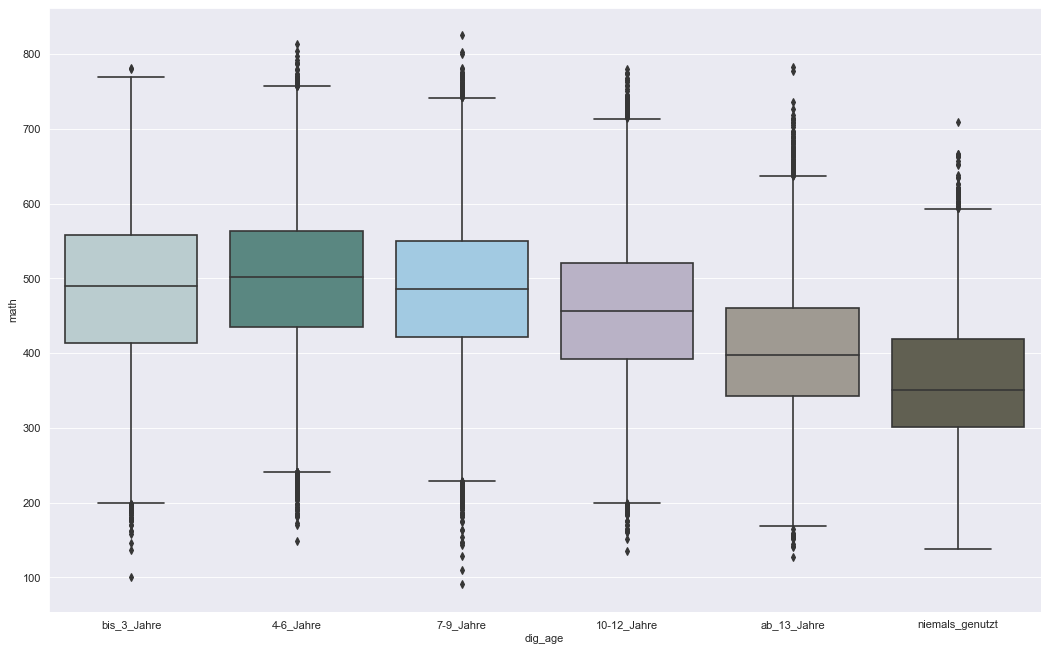

In [17]:
colors = ['#b7ced2','#528e86','#97cded', '#b8afc9', '#a19a90', '#636250']
plt.figure(figsize=(16,10), dpi= 80)  
sns.set_style(style = 'darkgrid')
sns.boxplot(x="dig_age", y="math", data=df_boxplot_sort_dig,palette=colors);


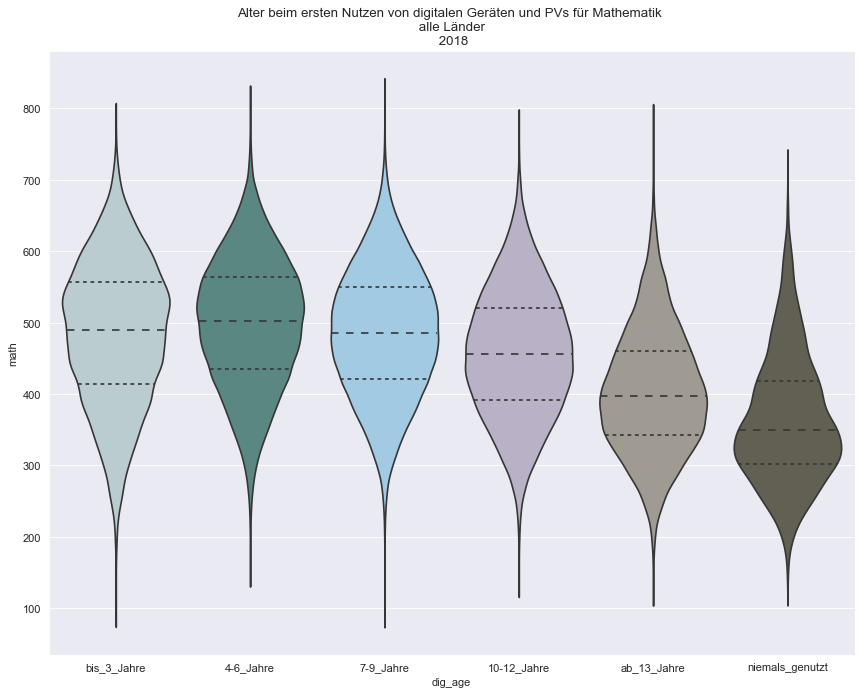

In [18]:
plt.figure(figsize=(13,10), dpi= 80)

sns.violinplot(data=df_boxplot_sort_dig, x='dig_age', y='math',  scale='width', inner='quartile', palette=colors)
sns.set_style(style = 'darkgrid')


plt.title('Alter beim ersten Nutzen von digitalen Geräten und PVs für Mathematik \n alle Länder \n 2018')
plt.show()


### Vergleich von Ländern mit unterschiedlichem Armut-Niveau


In [19]:
df_boxplot_sort_dig['Country code 3-character'].unique()


array(['ISR', 'HUN', 'URY', 'SRB', 'DNK', 'ESP', 'CHL', 'ITA', 'GBR',
       'BRA', 'MEX', 'QMR', 'KAZ', 'BEL', 'QRT', 'CRI', 'USA', 'PAN',
       'CZE', 'HKG', 'BRN', 'HRV', 'BGR', 'MAR', 'AUS', 'GRC', 'MLT',
       'EST', 'DOM', 'SVK', 'IRL', 'SGP', 'NZL', 'SVN', 'ISL', 'ALB',
       'FIN', 'LTU', 'RUS', 'CHE', 'POL', 'TAP', 'JPN', 'FRA', 'TUR',
       'LVA', 'SWE', 'LUX', 'THA', 'GEO', 'MAC', 'KOR', 'QAZ', 'ARG',
       'AUT', 'BIH', 'BLR', 'CAN', 'COL', 'DEU', 'IDN', 'KSV', 'JOR',
       'LBN', 'MYS', 'MDA', 'MNE', 'NLD', 'NOR', 'PER', 'PHL', 'PRT',
       'QAT', 'ROU', 'SAU', 'VNM', 'ARE', 'UKR', 'MKD', 'QCI'],
      dtype=object)

In [20]:
df_länder_2018 = df_boxplot_sort_dig.loc[df_boxplot_sort_dig['Country code 3-character'].isin([ 'HUN', 'GRC', 'DOM'])]
df_länder_18 = df_länder_2018.sort_values(by='How old were you when you first used a digital device?')

In [21]:
land_map = {'HUN': 'Hongkong', 'GRC': 'Griechenland', 'DOM': 'Dominikanische Republik'}
df_länder_18['Country'] = df_länder_18['Country code 3-character'].map(land_map)

In [22]:
df_länder_18

,Country code 3-character,Intl. Student ID,dig_age,int_age,math,read,scie,How old were you when you first used a digital device?,How old were you when you first accessed the Internet?,Country
209993,HUN,34800254.0,bis_3_Jahre,bis_3_Jahre,646.5532,647.2412,653.3231,1.0,1.0,Hongkong
199590,GRC,30002452.0,bis_3_Jahre,10-12_Jahre,553.4930,553.7825,534.5208,1.0,4.0,Griechenland
163961,DOM,21400695.0,bis_3_Jahre,bis_3_Jahre,362.1745,363.0998,378.6134,1.0,1.0,Dominikanische Republik
163930,DOM,21400657.0,bis_3_Jahre,7-9_Jahre,509.5057,551.1196,531.6876,1.0,3.0,Dominikanische Republik
163941,DOM,21400673.0,bis_3_Jahre,bis_3_Jahre,422.8611,413.5518,402.6672,1.0,1.0,Dominikanische Republik
...,...,...,...,...,...,...,...,...,...,...
214844,HUN,34805549.0,NaN,NaN,437.2181,435.0034,472.0275,NaN,NaN,Hongkong
214846,HUN,34805551.0,NaN,NaN,355.0624,337.0535,367.9224,NaN,NaN,Hongkong
214858,HUN,34805564.0,NaN,NaN,451.1453,466.9451,466.6314,NaN,NaN,Hongkong
214865,HUN,34805572.0,NaN,NaN,528.8398,505.4762,506.5013,NaN,NaN,Hongkong


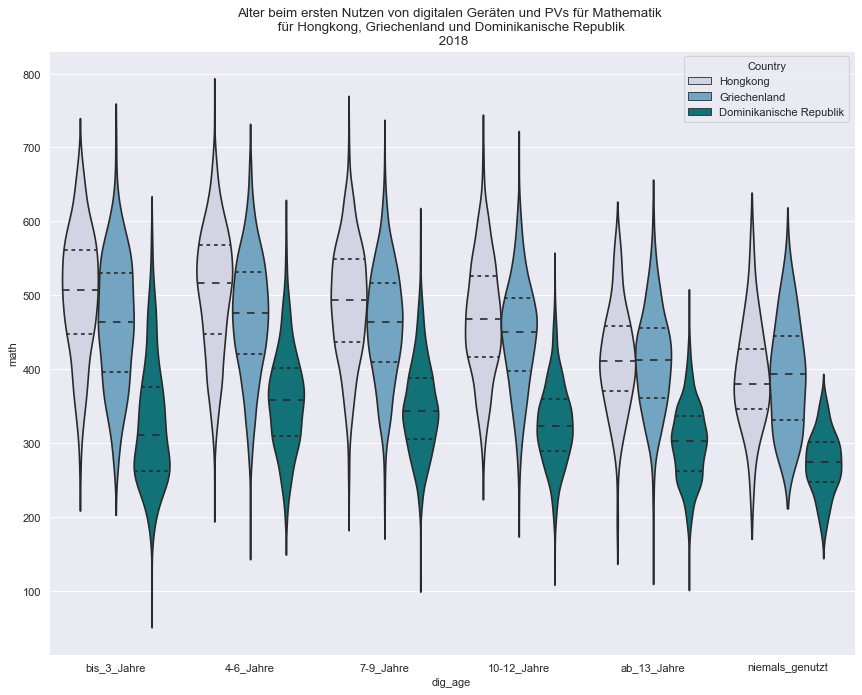

In [23]:
plt.figure(figsize=(13,10), dpi= 80)

sns.violinplot(data=df_länder_18, x='dig_age', y='math', hue = 'Country', scale='width', inner='quartile', palette='PuBuGn')
sns.set_style(style = 'darkgrid')

plt.title('Alter beim ersten Nutzen von digitalen Geräten und PVs für Mathematik \n für Hongkong, Griechenland und Dominikanische Republik \n 2018')
plt.show()

